In [45]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

In [46]:
def f(x):
    if x <= 0.5:
        return np.sin(x*3)
    else:
        return np.sin((1-x)*3)

In [47]:
N = 5000
A = np.tril(np.ones((N,N))*(1/N))
grid = np.arange(0,1,1/N)

In [48]:
data = []
for i in range(0,N):
    data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
data = np.array(data)

g = data
print(np.linalg.norm(g-data)/np.linalg.norm(data))
g = np.reshape(g, (N,1))

0.0


In [49]:
theta = 0.00001
solution = np.linalg.solve((np.transpose(A)@A+theta*np.eye(N)), np.transpose(A)@g)

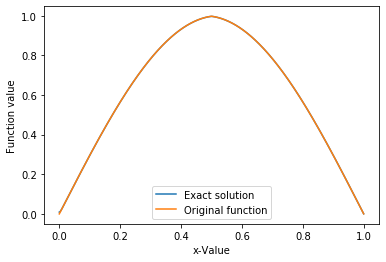

In [50]:
import matplotlib.pyplot as plt


plt.plot(grid, solution, label='Exact solution')
true_function = []
for val in grid:
    true_function.append(f(val))
plt.plot(grid, true_function, label='Original function')
plt.xlabel('x-Value')
plt.ylabel('Function value')
plt.legend()


In [51]:
epsilon = (np.random.rand(1,N)-0.5)
epsilon = np.reshape(epsilon, (N))
epsilon = (epsilon/np.linalg.norm(epsilon))*np.linalg.norm(data)*0.05
g_ = data+epsilon
print(np.linalg.norm(g_-data)/np.linalg.norm(data))
g_ = np.reshape(g_, (N,1))

0.05


In [52]:
theta = 0.002
solution_ = np.linalg.solve((np.transpose(A)@A+theta*np.eye(N)), np.transpose(A)@g_)

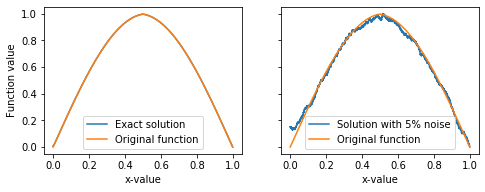

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(7.5, 3), sharey=True)
fig.subplots_adjust(bottom=0.2,right=0.93)
axs[0].plot(grid, solution, label='Exact solution')
axs[0].plot(grid, true_function, label='Original function')
axs[1].plot(grid, solution_, label='Solution with 5% noise')
axs[1].plot(grid, true_function, label='Original function')

axs[0].set_xlabel('x-value')
axs[0].set_ylabel('Function value')
axs[1].set_xlabel('x-value')
axs[0].legend()
axs[1].legend()
#fig.legend()
plt.savefig('sin-func_tikho', format='pdf')